In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)
import pandas as pd
import numpy as np
import keras
import warnings
warnings.filterwarnings(action="ignore")
import matplotlib.pyplot as plt

import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping

import sklearn.metrics as metrics
from keras.callbacks import LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x, verbose=0)
import os
import pandas as pd

MildDemented_dir = r'/kaggle/input/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset/MildDemented'
ModerateDemented_dir = r'/kaggle/input/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset/ModerateDemented'
NonDemented_dir = r'/kaggle/input/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset/NonDemented'
VeryMildDemented_dir = r'/kaggle/input/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset/VeryMildDemented'

filepaths = []
labels = []
dict_list = [MildDemented_dir, ModerateDemented_dir, NonDemented_dir, VeryMildDemented_dir]
class_labels = ['Mild Demented', 'Moderate Demented', 'Non Demented', 'Very MildDemented']

for i, j in enumerate(dict_list):
    flist = os.listdir(j)
    for f in flist:
        fpath = os.path.join(j, f)
        filepaths.append(fpath)
        labels.append(class_labels[i])

Fseries = pd.Series(filepaths, name="filepaths")
Lseries = pd.Series(labels, name="labels")
Alzheimer_data = pd.concat([Fseries, Lseries], axis=1)
Alzheimer_df = pd.DataFrame(Alzheimer_data)
print(Alzheimer_df.head())
print(Alzheimer_df["labels"].value_counts())
train_images, test_images = train_test_split(Alzheimer_df, test_size=0.3, random_state=42)
train_set, val_set = train_test_split(Alzheimer_df, test_size=0.2, random_state=42)
image_gen = ImageDataGenerator(preprocessing_function= tf.keras.applications.mobilenet_v2.preprocess_input)
train = image_gen.flow_from_dataframe(dataframe= train_set,x_col="filepaths",y_col="labels",
                                      target_size=(244,244),
                                      color_mode='rgb',
                                      class_mode="categorical", #used for Sequential Model
                                      batch_size=32,
                                      shuffle=False            #do not shuffle data
                                     )
test = image_gen.flow_from_dataframe(dataframe= test_images,x_col="filepaths", y_col="labels",
                                     target_size=(244,244),
                                     color_mode='rgb',
                                     class_mode="categorical",
                                     batch_size=32,
                                     shuffle= False
                                    )
val = image_gen.flow_from_dataframe(dataframe= val_set,x_col="filepaths", y_col="labels",
                                    target_size=(244,244),
                                    color_mode= 'rgb',
                                    class_mode="categorical",
                                    batch_size=32,
                                    shuffle=False
                                   )
classes=list(train.class_indices.keys())

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)
import pandas as pd
import numpy as np
import keras
import warnings
warnings.filterwarnings(action="ignore")
import matplotlib.pyplot as plt

import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping

import sklearn.metrics as metrics
from keras.callbacks import LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x, verbose=0)
import os
import pandas as pd

MildDemented_dir = r'/kaggle/input/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset/MildDemented'
ModerateDemented_dir = r'/kaggle/input/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset/ModerateDemented'
NonDemented_dir = r'/kaggle/input/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset/NonDemented'
VeryMildDemented_dir = r'/kaggle/input/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset/VeryMildDemented'

filepaths = []
labels = []
dict_list = [MildDemented_dir, ModerateDemented_dir, NonDemented_dir, VeryMildDemented_dir]
class_labels = ['Mild Demented', 'Moderate Demented', 'Non Demented', 'Very MildDemented']

for i, j in enumerate(dict_list):
    flist = os.listdir(j)
    for f in flist:
        fpath = os.path.join(j, f)
        filepaths.append(fpath)
        labels.append(class_labels[i])

Fseries = pd.Series(filepaths, name="filepaths")
Lseries = pd.Series(labels, name="labels")
Alzheimer_data = pd.concat([Fseries, Lseries], axis=1)
Alzheimer_df = pd.DataFrame(Alzheimer_data)
print(Alzheimer_df.head())
print(Alzheimer_df["labels"].value_counts())
train_images, test_images = train_test_split(Alzheimer_df, test_size=0.3, random_state=42)
train_set, val_set = train_test_split(Alzheimer_df, test_size=0.2, random_state=42)
image_gen = ImageDataGenerator(preprocessing_function= tf.keras.applications.mobilenet_v2.preprocess_input)
train = image_gen.flow_from_dataframe(dataframe= train_set,x_col="filepaths",y_col="labels",
                                      target_size=(244,244),
                                      color_mode='rgb',
                                      class_mode="categorical", #used for Sequential Model
                                      batch_size=32,
                                      shuffle=False            #do not shuffle data
                                     )
test = image_gen.flow_from_dataframe(dataframe= test_images,x_col="filepaths", y_col="labels",
                                     target_size=(244,244),
                                     color_mode='rgb',
                                     class_mode="categorical",
                                     batch_size=32,
                                     shuffle= False
                                    )
val = image_gen.flow_from_dataframe(dataframe= val_set,x_col="filepaths", y_col="labels",
                                    target_size=(244,244),
                                    color_mode= 'rgb',
                                    class_mode="categorical",
                                    batch_size=32,
                                    shuffle=False
                                   )
classes=list(train.class_indices.keys())
print (classes)
from tensorflow.keras import layers
from tensorflow.keras import layers, regularizers, models
import tensorflow as tf

input_layer = layers.Input(shape=(244, 244, 3))

x = layers.Conv2D(128, (8, 8), strides=(3, 3), activation='relu',
                  kernel_regularizer=regularizers.l2(0.001))(input_layer)
x = layers.BatchNormalization()(x)

x = layers.Conv2D(256, (5, 5), strides=(1, 1), activation='relu', padding="same",
                  kernel_regularizer=regularizers.l2(0.001))(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPool2D(pool_size=(3, 3))(x)

x = layers.Conv2D(256, (3, 3), strides=(1, 1), activation='relu', padding="same",
                  kernel_regularizer=regularizers.l2(0.001))(x)
x = layers.BatchNormalization()(x)

x = layers.Conv2D(256, (1, 1), strides=(1, 1), activation='relu', padding="same",
                  kernel_regularizer=regularizers.l2(0.001))(x)
x = layers.BatchNormalization()(x)

x = layers.Conv2D(256, (1, 1), strides=(1, 1), activation='relu', padding="same",
                  kernel_regularizer=regularizers.l2(0.001))(x)
x = layers.BatchNormalization()(x)

x = layers.Conv2D(512, (3, 3), activation='relu', padding="same",
                  kernel_regularizer=regularizers.l2(0.001))(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)

x = layers.Conv2D(512, (3, 3), activation='relu', padding="same",
                  kernel_regularizer=regularizers.l2(0.001))(x)
x = layers.BatchNormalization()(x)

x = layers.Conv2D(512, (3, 3), activation='relu', padding="same",
                  kernel_regularizer=regularizers.l2(0.001))(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)

x = layers.Conv2D(512, (3, 3), activation='relu', padding="same",
                  kernel_regularizer=regularizers.l2(0.001))(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)

x = layers.Flatten()(x)

x = layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
x = layers.Dropout(0.5)(x)

x = layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
x = layers.Dropout(0.5)(x)

output_layer = layers.Dense(4, activation='softmax')(x)

model = models.Model(inputs=input_layer, outputs=output_layer)

model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
    metrics=['accuracy']
)

print(model.summary())

history = model.fit(train, epochs=22, validation_data=val, validation_freq=1)
model.save("tekeer_l2.h5")

import tensorflow as tf

# 1. Load the model


# 3. Evaluate
test_loss, test_acc = model.evaluate(test, verbose=1)
print(f"Test Accuracy: {test_acc*100:.2f}%")

pred = model.predict(test)
pred = np.argmax(pred, axis=1) #pick class with highest  probability

labels = (train.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred2 = [labels[k] for k in pred]

In [ ]:
import tensorflow as tf

# 1. Load the model
model=load_model("/kaggle/working/tekeer.h5")

# 3. Evaluate
test_loss, test_acc = model.evaluate(test, verbose=1)
print(f"Test Accuracy: {test_acc*100:.2f}%")

pred = model.predict(test)
pred = np.argmax(pred, axis=1) #pick class with highest  probability

labels = (train.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred2 = [labels[k] for k in pred]
from sklearn.metrics import confusion_matrix, accuracy_score

y_test = test_images.labels # set y_test to the expected output
print(classification_report(y_test, pred2))
print("Accuracy of the Model:","{:.1f}%".format(accuracy_score(y_test, pred2)*100))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define the class labels
class_labels = ['Mild Demented', 'Moderate Demented', 'Non Demented', 'Very MildDemented']

# Calculate the confusion matrix
cm = confusion_matrix(y_test, pred2)

# Create a figure and plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues')

# Set tick labels and axis labels
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=class_labels)
plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Set the title
plt.title("Confusion Matrix")

# Show the plot
plt.show()

In [ ]:
#best boi for testing
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

img = tf.keras.utils.load_img("/kaggle/input/ya-bxhxj/best_saved_test_images/image_10005_label_Mild Demented.jpg", target_size=(244,244))
img = tf.keras.utils.img_to_array(img)
img = np.expand_dims(img, axis=0)

img = preprocess_input(img)  # 🚨 This line is essential
prediction = model.predict(img)
predicted_class_index = np.argmax(prediction, axis=1)[0]

# If you have a list of class labels, you can map the index to a label
class_labels = ['MildDemented','ModerateDemented','Non Demented', 'VeryMildDemented']  # Example, modify based on your labels
predicted_class = class_labels[predicted_class_index]

print(f"Predicted class: {predicted_class}")



In [3]:
import shutil

# Delete a folder and all its contents
folder_path = '/kaggle/working/non_important'
shutil.rmtree(folder_path)

In [9]:
import os

def count_images_in_folder(folder_path):
    image_extensions = ['.png', '.jpg', '.jpeg']
    image_count = 0

    # Loop through files in the folder
    for filename in os.listdir(folder_path):
        # Check if the file has an image extension
        if any(filename.lower().endswith(ext) for ext in image_extensions):
            image_count += 1
    
    return image_count

# Example usage
folder_path = '/kaggle/working/important'  # Change this to your folder path
num_images = count_images_in_folder(folder_path)
print(f"Number of images in the folder: {num_images}")


Number of images in the folder: 41735


In [7]:
import os

# Configuration
folder_path = "/kaggle/working/non_important"
image_extensions = {'.jpg', '.jpeg', '.png', '.gif', '.bmp', '.webp'}
max_files_to_delete = 17000

# Get all image files in the directory
image_files = []
for entry in os.listdir(folder_path):
    full_path = os.path.join(folder_path, entry)
    if os.path.isfile(full_path):
        ext = os.path.splitext(entry)[1].lower()
        if ext in image_extensions:
            image_files.append(full_path)

# Determine how many files to delete
delete_count = min(max_files_to_delete, len(image_files))

# Delete files with progress feedback
for i, file_path in enumerate(image_files[:delete_count]):
    try:
        os.remove(file_path)
        if i % 500 == 0:  # Print progress every 500 files
            print(f"Deleted {i + 1}/{delete_count} files...")
    except Exception as e:
        print(f"Error deleting {file_path}: {str(e)}")

print(f"\nSuccessfully deleted {delete_count} images.")
print(f"Remaining images: {len(image_files) - delete_count}")

Deleted 1/17000 files...
Deleted 501/17000 files...
Deleted 1001/17000 files...
Deleted 1501/17000 files...
Deleted 2001/17000 files...
Deleted 2501/17000 files...
Deleted 3001/17000 files...
Deleted 3501/17000 files...
Deleted 4001/17000 files...
Deleted 4501/17000 files...
Deleted 5001/17000 files...
Deleted 5501/17000 files...
Deleted 6001/17000 files...
Deleted 6501/17000 files...
Deleted 7001/17000 files...
Deleted 7501/17000 files...
Deleted 8001/17000 files...
Deleted 8501/17000 files...
Deleted 9001/17000 files...
Deleted 9501/17000 files...
Deleted 10001/17000 files...
Deleted 10501/17000 files...
Deleted 11001/17000 files...
Deleted 11501/17000 files...
Deleted 12001/17000 files...
Deleted 12501/17000 files...
Deleted 13001/17000 files...
Deleted 13501/17000 files...
Deleted 14001/17000 files...
Deleted 14501/17000 files...
Deleted 15001/17000 files...
Deleted 15501/17000 files...
Deleted 16001/17000 files...
Deleted 16501/17000 files...

Successfully deleted 17000 images.
Re

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

class GradCAM:
    """
    Simplified implementation of Grad-CAM with fallback options
    when higher-order derivatives are not available
    """
    def __init__(self, model, layer_name=None):
        """
        Initialize Grad-CAM with a trained model and target layer
        
        Args:
            model: Trained TensorFlow model
            layer_name: Name of the target convolutional layer for visualization.
                        If None, the last convolutional layer will be used.
        """
        self.model = model
        
        # If layer name is not specified, find the last conv layer
        if layer_name is None:
            for layer in reversed(model.layers):
                if isinstance(layer, tf.keras.layers.Conv2D):
                    layer_name = layer.name
                    break
            print(f"Using layer: {layer_name}")
        
        self.layer_name = layer_name
        
        # Get the target layer
        self.target_layer = model.get_layer(layer_name)
        
    def compute_heatmap(self, image, class_idx=None, eps=1e-8):
        """
        Generate Grad-CAM heatmap for a specific class
        
        Args:
            image: Input image (can be a numpy array or a tensor)
            class_idx: Index of the target class. If None, the predicted class will be used
            eps: Small epsilon value to avoid division by zero
            
        Returns:
            Normalized heatmap as a numpy array
        """
        # Convert image to tensor if needed
        if not isinstance(image, tf.Tensor):
            image = tf.convert_to_tensor(image)
            
        # Convert image to a batch of one if not already
        if len(image.shape) == 3:
            image = tf.expand_dims(image, axis=0)
            
        # Create a model that outputs both the predictions and the intermediate feature maps
        grad_model = tf.keras.models.Model(
            inputs=[self.model.inputs],
            outputs=[self.model.get_layer(self.layer_name).output, self.model.output]
        )
        
        # Get predictions
        with tf.GradientTape() as tape:
            # Cast image to float32 to ensure compatibility
            conv_outputs, predictions = grad_model(tf.cast(image, tf.float32))
            
            # If class_idx is not provided, use the predicted class
            if class_idx is None:
                class_idx = tf.argmax(predictions[0])
            
            # Get the target class prediction
            target = predictions[:, class_idx]
        
        # Get gradients of the target class with respect to the output feature map
        try:
            grads = tape.gradient(target, conv_outputs)
            
            # If gradients are None, use a fallback approach
            if grads is None:
                print("Warning: Gradients are None. Using fallback approach.")
                return self._fallback_heatmap(image)
                
            # Average gradients spatially
            pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
            
            # Multiply each channel by its importance and then sum all channels
            conv_outputs = conv_outputs[0]
            
            # Create a weighted sum of the conv outputs using the gradients as weights
            for i in range(pooled_grads.shape[-1]):
                conv_outputs[:, :, i] *= pooled_grads[i]
                
            # The feature map is the sum of all channels
            heatmap = tf.reduce_sum(conv_outputs, axis=-1)
            
            # Apply ReLU to the heatmap
            heatmap = tf.maximum(heatmap, 0) / (tf.reduce_max(heatmap) + eps)
            heatmap = heatmap.numpy()
            
            # Resize heatmap to match input image dimensions
            h, w = image.shape[1:3]
            heatmap = cv2.resize(heatmap, (w, h))
            
            return heatmap
            
        except Exception as e:
            print(f"Error computing gradients: {e}")
            return self._fallback_heatmap(image)
    
    def _fallback_heatmap(self, image):
        """
        Generate a fallback heatmap when gradient computation fails
        
        This method uses activation maximization instead of gradients.
        
        Args:
            image: Input image tensor
            
        Returns:
            Simple heatmap based on activation values
        """
        print("Using fallback heatmap generation method")
        
        # Create a model that outputs just the conv layer activation
        activation_model = tf.keras.models.Model(
            inputs=self.model.inputs,
            outputs=self.model.get_layer(self.layer_name).output
        )
        
        # Get the feature map activations
        activation = activation_model(tf.cast(image, tf.float32))
        
        # Take the mean across channels
        heatmap = tf.reduce_mean(activation, axis=-1)
        
        # Normalize the heatmap
        heatmap = heatmap[0]
        heatmap = heatmap - tf.reduce_min(heatmap)
        heatmap = heatmap / (tf.reduce_max(heatmap) + 1e-8)
        
        # Convert to numpy and resize
        heatmap = heatmap.numpy()
        h, w = image.shape[1:3]
        heatmap = cv2.resize(heatmap, (w, h))
        
        return heatmap
    
    def overlay_heatmap(self, image, heatmap, alpha=0.5, colormap=cv2.COLORMAP_JET):
        """
        Overlay heatmap on the original image
        
        Args:
            image: Original image
            heatmap: Heatmap generated by compute_heatmap
            alpha: Weight for blending
            colormap: OpenCV colormap to use
            
        Returns:
            Superimposed visualization
        """
        # Convert image to numpy if it's a tensor
        if isinstance(image, tf.Tensor):
            image = image.numpy()
            
        # Remove batch dimension if present
        if len(image.shape) == 4:
            image = image[0]
            
        # Normalize image if needed
        if np.max(image) <= 1.0:
            image = (image * 255).astype(np.uint8)
        
        # Create heatmap
        heatmap_colored = cv2.applyColorMap(np.uint8(255 * heatmap), colormap)
        
        # Convert RGB to BGR if image is RGB (cv2 uses BGR)
        if image.shape[-1] == 3:
            image_bgr = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        else:
            image_bgr = image
            
        # Superimpose heatmap on original image
        superimposed = cv2.addWeighted(image_bgr, 1 - alpha, heatmap_colored, alpha, 0)
        
        # Convert back to RGB for display in matplotlib
        superimposed = cv2.cvtColor(superimposed, cv2.COLOR_BGR2RGB)
        
        return superimposed

def visualize_model_attention(model_path, image_path, class_idx=None, layer_name=None):
    # Load the saved model
    try:
        model = tf.keras.models.load_model(model_path)
        print(f"Model loaded successfully from {model_path}")
    except Exception as e:
        print(f"Error loading model: {e}")
        return None, None
    
    # Initialize Grad-CAM
    grad_cam = GradCAM(model, layer_name)
    
    # Get expected image shape from model
    expected_height, expected_width = model.input_shape[1:3]
    
    # Load and preprocess the image USING SPECIFIED PREPROCESSING
    try:
        print(f"Loading image from {image_path}")
        
        # Load image using keras utils
        from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
        img = tf.keras.utils.load_img(image_path, target_size=(244, 244))
        img_array = tf.keras.utils.img_to_array(img)
        img_tensor = np.expand_dims(img_array, axis=0)
        img_tensor = preprocess_input(img_tensor)  # 🚨 This line is essential
        
        # Also load the original image for display (without preprocessing)
        img_display = tf.keras.utils.load_img(image_path, target_size=(244, 244))
        img_display_array = tf.keras.utils.img_to_array(img_display) / 255.0
        
        print(f"Image loaded and preprocessed to shape {img_tensor.shape}")
    except Exception as e:
        print(f"Error loading image: {e}")
        return None, None
    
    # Get model prediction
    try:
        preds = model.predict(img_tensor)
        pred_class = np.argmax(preds[0])
        class_labels = ['MildDemented','ModerateDemented','Non Demented', 'VeryMildDemented']  # Example, modify based on your labels
        predicted_class = class_labels[pred_class]

        print(f"Predicted class: {predicted_class}")
        print(f"Model prediction: class {pred_class} with confidence {preds[0][pred_class]:.4f}")
    except Exception as e:
        print(f"Error getting model prediction: {e}")
        return None, None
    
    # If class_idx not specified, use predicted class
    if class_idx is None:
        class_idx = pred_class
        
    print(f"Generating heatmap for class {class_idx}")
    
    # Generate and normalize heatmap
    try:
        heatmap = grad_cam.compute_heatmap(img_tensor, class_idx)
        print(f"Heatmap generated with shape {heatmap.shape}")
    except Exception as e:
        print(f"Error generating heatmap: {e}")
        return None, None
    
    # Overlay heatmap on original image
    try:
        superimposed = grad_cam.overlay_heatmap(img_display_array, heatmap)
        print("Heatmap overlaid on original image")
    except Exception as e:
        print(f"Error overlaying heatmap: {e}")
        return None, None
     # ========================================
    # 🔥 NEW SECTION: Sliding window patch extraction
    # ========================================
    import os

    window_size = 10
    stride = 10
    threshold = 0.9  # 60% of pixels must be high-activation
    activation_cutoff = 0.9  # Red intensity threshold
    important_dir="important"
    os.makedirs("important", exist_ok=True)
    os.makedirs("non_important", exist_ok=True)

    patch_id = 0
    h, w = heatmap.shape

    for y in range(0, h - window_size + 1, stride):
        for x in range(0, w - window_size + 1, stride):
            patch = heatmap[y:y + window_size, x:x + window_size]
            
            # Calculate % of pixels above activation threshold
            high_activation_ratio = np.mean(patch >= activation_cutoff)
            
            # Get same patch from the RGB image
            original_img = cv2.imread(image_path)
            if original_img is None:
                print(f"Error: Could not load original image from {image_path}")
                # Skip this iteration or use a fallback
                continue
            original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
            resized_img = cv2.resize(original_img, (244, 244))
            original_img=resized_img

            # Calculate scaling factors between heatmap and original image
            orig_height, orig_width = original_img.shape[:2]
            scale_y = orig_height / heatmap.shape[0]
            scale_x = orig_width / heatmap.shape[1]
            
            # Convert heatmap coordinates to original image coordinates
            orig_y = int(y * scale_y)
            orig_x = int(x * scale_x)
            orig_window_y = int(window_size * scale_y)
            orig_window_x = int(window_size * scale_x)
            
            # Make sure we don't exceed image boundaries
            if orig_y + orig_window_y <= orig_height and orig_x + orig_window_x <= orig_width:
                # Extract the patch from the original image using scaled coordinates
                image_patch = original_img[orig_y:orig_y + orig_window_y, orig_x:orig_x + orig_window_x]
            else:
                # Skip this patch or use a default patch
                continue

            
            # Determine where to save
            save_dir = "important" if high_activation_ratio >= threshold else "non_important"
            filename = f"{save_dir}/patch_{patch_id}.png"
            
            # Save using OpenCV (convert RGB to BGR)
            cv2.imwrite(filename, cv2.cvtColor((image_patch * 255).astype(np.uint8), cv2.COLOR_RGB2BGR))
            patch_id += 1

    print(f"✅ Saved {patch_id} patches ")
    # ========================================
    # 🔥 END OF NEW SECTION
    # ========================================
    
    # Display results
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    
    # Original image
    axs[0].imshow(img_display_array)
    axs[0].set_title('Original Image')
    axs[0].axis('off')
    
    # Heatmap
    axs[1].imshow(heatmap, cmap='jet')
    axs[1].set_title('Grad-CAM Heatmap')
    axs[1].axis('off')
    
    # Superimposed visualization
    axs[2].imshow(superimposed)
    axs[2].set_title('Grad-CAM Visualization')
    axs[2].axis('off')
    
    plt.tight_layout()
    plt.savefig('gradcam_result.png')  # Save figure as well
    plt.show()
    
    print(f"Predicted class: {pred_class}")
    print(f"Visualizing for class: {class_idx}")
    
    return heatmap, superimposed

# Example of how to use the function:
# Modified example with new path

        
visualize_model_attention('/kaggle/working/tekeer.h5', "/kaggle/input/ya-bxhxj/best_saved_test_images/image_10003_label_Moderate Demented.jpg")

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

class GradCAM:
    """
    Simplified implementation of Grad-CAM with fallback options
    when higher-order derivatives are not available
    """
    def __init__(self, model, layer_name=None):
        """
        Initialize Grad-CAM with a trained model and target layer
        
        Args:
            model: Trained TensorFlow model
            layer_name: Name of the target convolutional layer for visualization.
                        If None, the last convolutional layer will be used.
        """
        self.model = model
        
        # If layer name is not specified, find the last conv layer
        if layer_name is None:
            for layer in reversed(model.layers):
                if isinstance(layer, tf.keras.layers.Conv2D):
                    layer_name = layer.name
                    break
           # print(f"Using layer: {layer_name}")
        
        self.layer_name = layer_name
        
        # Get the target layer
        self.target_layer = model.get_layer(layer_name)
        
    def compute_heatmap(self, image, class_idx=None, eps=1e-8):
        """
        Generate Grad-CAM heatmap for a specific class
        
        Args:
            image: Input image (can be a numpy array or a tensor)
            class_idx: Index of the target class. If None, the predicted class will be used
            eps: Small epsilon value to avoid division by zero
            
        Returns:
            Normalized heatmap as a numpy array
        """
        # Convert image to tensor if needed
        if not isinstance(image, tf.Tensor):
            image = tf.convert_to_tensor(image)
            
        # Convert image to a batch of one if not already
        if len(image.shape) == 3:
            image = tf.expand_dims(image, axis=0)
            
        # Create a model that outputs both the predictions and the intermediate feature maps
        grad_model = tf.keras.models.Model(
            inputs=[self.model.inputs],
            outputs=[self.model.get_layer(self.layer_name).output, self.model.output]
        )
        
        # Get predictions
        with tf.GradientTape() as tape:
            # Cast image to float32 to ensure compatibility
            conv_outputs, predictions = grad_model(tf.cast(image, tf.float32))
            
            # If class_idx is not provided, use the predicted class
            if class_idx is None:
                class_idx = tf.argmax(predictions[0])
            
            # Get the target class prediction
            target = predictions[:, class_idx]
        
        # Get gradients of the target class with respect to the output feature map
        try:
            grads = tape.gradient(target, conv_outputs)
            
            # If gradients are None, use a fallback approach
            if grads is None:
                print("Warning: Gradients are None. Using fallback approach.")
                return self._fallback_heatmap(image)
                
            # Average gradients spatially
            pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
            
            # Multiply each channel by its importance and then sum all channels
            conv_outputs = conv_outputs[0]
            
            # Create a weighted sum of the conv outputs using the gradients as weights
            for i in range(pooled_grads.shape[-1]):
                conv_outputs[:, :, i] *= pooled_grads[i]
                
            # The feature map is the sum of all channels
            heatmap = tf.reduce_sum(conv_outputs, axis=-1)
            
            # Apply ReLU to the heatmap
            heatmap = tf.maximum(heatmap, 0) / (tf.reduce_max(heatmap) + eps)
            heatmap = heatmap.numpy()
            
            # Resize heatmap to match input image dimensions
            h, w = image.shape[1:3]
            heatmap = cv2.resize(heatmap, (w, h))
            
            return heatmap
            
        except Exception as e:
            print(f"Error computing gradients: {e}")
            return self._fallback_heatmap(image)
    
    def _fallback_heatmap(self, image):
        """
        Generate a fallback heatmap when gradient computation fails
        
        This method uses activation maximization instead of gradients.
        
        Args:
            image: Input image tensor
            
        Returns:
            Simple heatmap based on activation values
        """
        #print("Using fallback heatmap generation method")
        
        # Create a model that outputs just the conv layer activation
        activation_model = tf.keras.models.Model(
            inputs=self.model.inputs,
            outputs=self.model.get_layer(self.layer_name).output
        )
        
        # Get the feature map activations
        activation = activation_model(tf.cast(image, tf.float32))
        
        # Take the mean across channels
        heatmap = tf.reduce_mean(activation, axis=-1)
        
        # Normalize the heatmap
        heatmap = heatmap[0]
        heatmap = heatmap - tf.reduce_min(heatmap)
        heatmap = heatmap / (tf.reduce_max(heatmap) + 1e-8)
        
        # Convert to numpy and resize
        heatmap = heatmap.numpy()
        h, w = image.shape[1:3]
        heatmap = cv2.resize(heatmap, (w, h))
        
        return heatmap
    
    def overlay_heatmap(self, image, heatmap, alpha=0.5, colormap=cv2.COLORMAP_JET):
        """
        Overlay heatmap on the original image
        
        Args:
            image: Original image
            heatmap: Heatmap generated by compute_heatmap
            alpha: Weight for blending
            colormap: OpenCV colormap to use
            
        Returns:
            Superimposed visualization
        """
        # Convert image to numpy if it's a tensor
        if isinstance(image, tf.Tensor):
            image = image.numpy()
            
        # Remove batch dimension if present
        if len(image.shape) == 4:
            image = image[0]
            
        # Normalize image if needed
        if np.max(image) <= 1.0:
            image = (image * 255).astype(np.uint8)
        
        # Create heatmap
        heatmap_colored = cv2.applyColorMap(np.uint8(255 * heatmap), colormap)
        
        # Convert RGB to BGR if image is RGB (cv2 uses BGR)
        if image.shape[-1] == 3:
            image_bgr = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        else:
            image_bgr = image
            
        # Superimpose heatmap on original image
        superimposed = cv2.addWeighted(image_bgr, 1 - alpha, heatmap_colored, alpha, 0)
        
        # Convert back to RGB for display in matplotlib
        superimposed = cv2.cvtColor(superimposed, cv2.COLOR_BGR2RGB)
        
        return superimposed

def visualize_model_attention(model_path, image_path,patch_id , class_idx=None, layer_name=None):
    # Load the saved model
    try:
        model = tf.keras.models.load_model(model_path)
        #print(f"Model loaded successfully from {model_path}")
    except Exception as e:
        print(f"Error loading model: {e}")
        return None, None
    
    # Initialize Grad-CAM
    grad_cam = GradCAM(model, layer_name)
    
    # Get expected image shape from model
    expected_height, expected_width = model.input_shape[1:3]
    
    # Load and preprocess the image USING SPECIFIED PREPROCESSING
    try:
        #print(f"Loading image from {image_path}")
        
        # Load image using keras utils
        from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
        img = tf.keras.utils.load_img(image_path, target_size=(244, 244))
        img_array = tf.keras.utils.img_to_array(img)
        img_tensor = np.expand_dims(img_array, axis=0)
        img_tensor = preprocess_input(img_tensor)  # 🚨 This line is essential
        
        # Also load the original image for display (without preprocessing)
        img_display = tf.keras.utils.load_img(image_path, target_size=(244, 244))
        img_display_array = tf.keras.utils.img_to_array(img_display) / 255.0
        
        #print(f"Image loaded and preprocessed to shape {img_tensor.shape}")
    except Exception as e:
        print(f"Error loading image: {e}")
        return None, None
    
    # Get model prediction
    try:
        preds = model.predict(img_tensor)
        pred_class = np.argmax(preds[0])
        class_labels = ['MildDemented','ModerateDemented','Non Demented', 'VeryMildDemented']  # Example, modify based on your labels
        predicted_class = class_labels[pred_class]

       # print(f"Predicted class: {predicted_class}")
        #print(f"Model prediction: class {pred_class} with confidence {preds[0][pred_class]:.4f}")
    except Exception as e:
        print(f"Error getting model prediction: {e}")
        return None, None
    
    # If class_idx not specified, use predicted class
    if class_idx is None:
        class_idx = pred_class
        
    #print(f"Generating heatmap for class {class_idx}")
    
    # Generate and normalize heatmap
    try:
        heatmap = grad_cam.compute_heatmap(img_tensor, class_idx)
     #   print(f"Heatmap generated with shape {heatmap.shape}")
    except Exception as e:
        print(f"Error generating heatmap: {e}")
        return None, None
    
    # Overlay heatmap on original image
    try:
        superimposed = grad_cam.overlay_heatmap(img_display_array, heatmap)
      #  print("Heatmap overlaid on original image")
    except Exception as e:
        print(f"Error overlaying heatmap: {e}")
        return None, None
     # ========================================
    # 🔥 NEW SECTION: Sliding window patch extraction
    # ========================================
    import os

    window_size = 32
    stride = 32
    threshold = 0.6  # 60% of pixels must be high-activation
    activation_cutoff = 0.6  # Red intensity threshold
    important_dir="important"
    os.makedirs("important", exist_ok=True)
    os.makedirs("non_important", exist_ok=True)

    
    h, w = heatmap.shape

    for y in range(0, h - window_size + 1, stride):
        for x in range(0, w - window_size + 1, stride):
            patch = heatmap[y:y + window_size, x:x + window_size]
            
            # Calculate % of pixels above activation threshold
            high_activation_ratio = np.mean(patch >= activation_cutoff)
            
            # Get same patch from the RGB image
            original_img = cv2.imread(image_path)
            if original_img is None:
                print(f"Error: Could not load original image from {image_path}")
                # Skip this iteration or use a fallback
                continue
            original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
            resized_img = cv2.resize(original_img, (244, 244))
            original_img=resized_img

            # Calculate scaling factors between heatmap and original image
            orig_height, orig_width = original_img.shape[:2]
            scale_y = orig_height / heatmap.shape[0]
            scale_x = orig_width / heatmap.shape[1]
            
            # Convert heatmap coordinates to original image coordinates
            orig_y = int(y * scale_y)
            orig_x = int(x * scale_x)
            orig_window_y = int(window_size * scale_y)
            orig_window_x = int(window_size * scale_x)
            
            # Make sure we don't exceed image boundaries
            if orig_y + orig_window_y <= orig_height and orig_x + orig_window_x <= orig_width:
                # Extract the patch from the original image using scaled coordinates
                image_patch = original_img[orig_y:orig_y + orig_window_y, orig_x:orig_x + orig_window_x]
            else:
                # Skip this patch or use a default patch
                continue

            
            # Determine where to save
            save_dir = "important" if high_activation_ratio >= threshold else "non_important"
            filename = f"{save_dir}/patch_{patch_id}.png"
            
            # Save using OpenCV (convert RGB to BGR)
            #cv2.imwrite(filename, cv2.cvtColor((image_patch * 255).astype(np.uint8), cv2.COLOR_RGB2BGR))
            # Replace the saving line with:
            patch_gray = cv2.cvtColor(image_patch, cv2.COLOR_RGB2GRAY)
            cv2.imwrite(filename, patch_gray)
            patch_id += 1

   #
    return heatmap, superimposed,patch_id

# Example of how to use the function:
# Modified example with new path
image_extensions = ['.png', '.jpg', '.jpeg']
folder_path = '/kaggle/input/ya-bxhxj/best_saved_test_images'
# Loop through files in the folder
import os

def count_images_in_folder(folder_path):
    image_extensions = ['.png', '.jpg', '.jpeg']
    image_count = 0

    # Loop through files in the folder
    for filename in os.listdir(folder_path):
        # Check if the file has an image extension
        if any(filename.lower().endswith(ext) for ext in image_extensions):
            image_count += 1
    
    return image_count

# Example usage
import os
from tqdm import tqdm

def count_images_in_folder(folder_path, image_extensions=('.jpg', '.jpeg', '.png', '.bmp', '.gif')):
    """Count images with specified extensions in a folder"""
    return sum(1 for filename in os.listdir(folder_path) 
               if any(filename.lower().endswith(ext) for ext in image_extensions))

import os
from tqdm import tqdm
import contextlib
import sys

# ... [rest of your imports and functions]

folder_path = '/kaggle/input/ya-bxhxj/best_saved_test_images'
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.gif')

# Count total images
num_images = count_images_in_folder(folder_path, image_extensions)
print(f"Found {num_images} images in the folder: {folder_path}")

# Process images with progress bar
processed = 0
patch_id=0
with tqdm(total=num_images, desc="Processing Images", unit="img") as pbar:
    for filename in os.listdir(folder_path):
        if any(filename.lower().endswith(ext) for ext in image_extensions):
            image_path = os.path.join(folder_path, filename)
            
            # Suppress print output during processing
            with open(os.devnull, 'w') as f, contextlib.redirect_stdout(f):
                 _, _, patch_id = visualize_model_attention('/kaggle/working/tekeer.h5', image_path, patch_id)
            
            
            processed += 1
            pbar.update(1)
            pbar.set_postfix({"Status": f"{processed}/{num_images} ({processed/num_images:.1%})"})

print(f"✅ Completed processing {processed}/{num_images} images!")

Exception ignored in: <function tqdm.__del__ at 0x7bff16ef96c0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/tqdm/std.py", line 1148, in __del__
    self.close()
  File "/usr/local/lib/python3.11/dist-packages/tqdm/std.py", line 1267, in close
    if self.disable:
       ^^^^^^^^^^^^
AttributeError: 'tqdm' object has no attribute 'disable'


Found 10196 images in the folder: /kaggle/input/ya-bxhxj/best_saved_test_images


Processing Images:  20%|█▉        | 2035/10196 [1:08:33<4:34:57,  2.02s/img, Status=2035/10196 (20.0%)]


KeyboardInterrupt: 

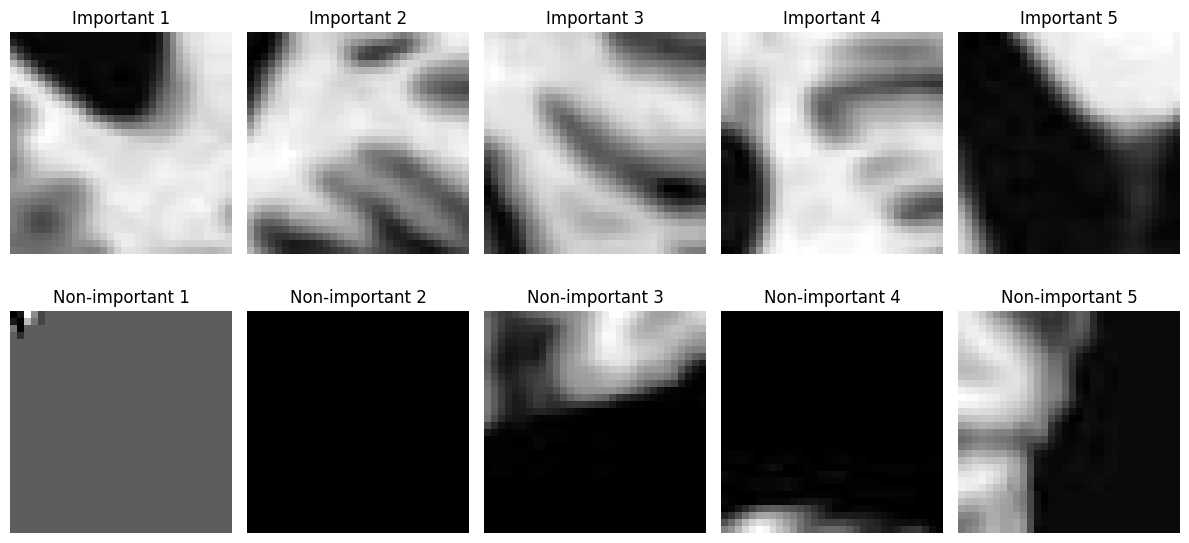

Loading important images from important...
Loading non-important images from non_important...
Feature vector dimensionality: 1024
Data distribution:
  Non-important: 40980 samples
  Important: 41735 samples
Training KNN model with k=5...
Test accuracy: 0.9040


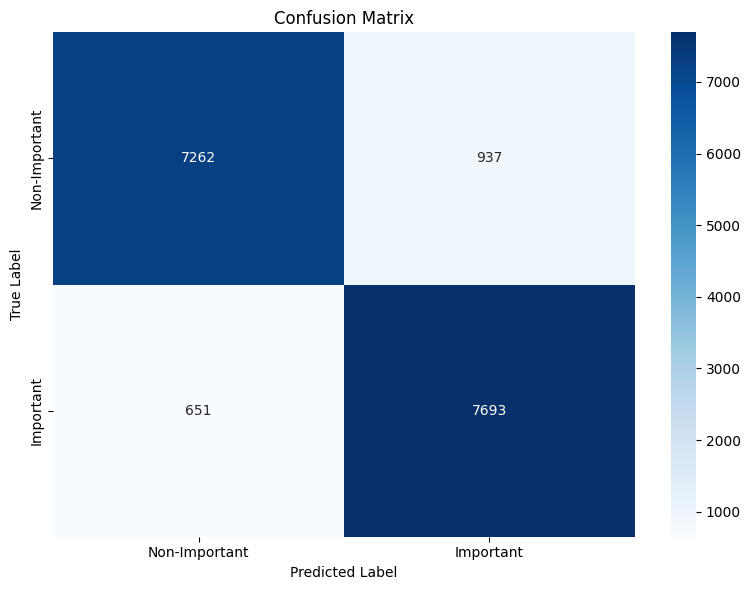

Model saved to 0.90-acc-knn_patch_classifier.pkl


In [10]:
import numpy as np
import cv2
import os
import pickle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

def load_and_prepare_data(important_dir='important', non_important_dir='non_important', img_size=(32, 32)):
    """
    Load images from directories and prepare features and labels
    Explicitly loading as grayscale
    """
    features = []
    labels = []
    
    # Load important images (label 1)
    print(f"Loading important images from {important_dir}...")
    if os.path.exists(important_dir):
        for filename in os.listdir(important_dir):
            if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(important_dir, filename)
                try:
                    # Load image as grayscale
                    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                    if img is not None:
                        img_resized = cv2.resize(img, img_size)
                        features.append(img_resized.flatten())
                        labels.append(1)
                except Exception as e:
                    print(f"Error loading {img_path}: {e}")
    
    # Load non-important images (label 0)
    print(f"Loading non-important images from {non_important_dir}...")
    if os.path.exists(non_important_dir):
        for filename in os.listdir(non_important_dir):
            if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(non_important_dir, filename)
                try:
                    # Load image as grayscale
                    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                    if img is not None:
                        img_resized = cv2.resize(img, img_size)
                        features.append(img_resized.flatten())
                        labels.append(0)
                except Exception as e:
                    print(f"Error loading {img_path}: {e}")
    
    # Print feature dimension for verification
    if features:
        print(f"Feature vector dimensionality: {len(features[0])}")
    
    return np.array(features), np.array(labels)

def train_and_evaluate_knn(features, labels, n_neighbors=5):
    """
    Train KNN model and evaluate it
    """
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        features, labels, test_size=0.2, random_state=42
    )
    
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train the model
    print(f"Training KNN model with k={n_neighbors}...")
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = knn.predict(X_test_scaled)
    
    # Calculate and display accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Test accuracy: {accuracy:.4f}")
    
    # Create confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Non-Important', 'Important'],
                yticklabels=['Non-Important', 'Important'])
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.savefig('confusion_matrix.png')
    plt.show()
    
    # Save the model with a descriptive name
    model_filename = f"{accuracy:.2f}-acc-knn_patch_classifier.pkl"
    with open(model_filename, 'wb') as f:
        pickle.dump(knn, f)
    print(f"Model saved to {model_filename}")
    
    return knn

def visualize_samples(important_dir='important', non_important_dir='non_important', num_samples=5):
    """
    Visualize sample images from both categories
    """
    plt.figure(figsize=(12, 6))
    
    # Plot important samples
    if os.path.exists(important_dir):
        important_files = [f for f in os.listdir(important_dir) 
                         if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        
        for i in range(min(num_samples, len(important_files))):
            if len(important_files) > i:
                img_path = os.path.join(important_dir, important_files[i])
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is not None:
                    plt.subplot(2, num_samples, i + 1)
                    plt.imshow(img, cmap='gray')
                    plt.title(f"Important {i+1}")
                    plt.axis('off')
    
    # Plot non-important samples
    if os.path.exists(non_important_dir):
        non_important_files = [f for f in os.listdir(non_important_dir) 
                             if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        
        for i in range(min(num_samples, len(non_important_files))):
            if len(non_important_files) > i:
                img_path = os.path.join(non_important_dir, non_important_files[i])
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is not None:
                    plt.subplot(2, num_samples, num_samples + i + 1)
                    plt.imshow(img, cmap='gray')
                    plt.title(f"Non-important {i+1}")
                    plt.axis('off')
    
    plt.tight_layout()
    plt.savefig('sample_patches.png')
    plt.show()

def main():
    # Visualize sample images to confirm they're grayscale
    visualize_samples()
    
    # Load and prepare data
    features, labels = load_and_prepare_data()
    
    # Print data distribution
    unique, counts = np.unique(labels, return_counts=True)
    print("Data distribution:")
    for label, count in zip(unique, counts):
        label_name = "Important" if label == 1 else "Non-important"
        print(f"  {label_name}: {count} samples")
    
    # Train and evaluate model
    knn_model = train_and_evaluate_knn(features, labels)

if __name__ == "__main__":
    main()

In [11]:
  save_model(knn_model, 'grayscale-85-percent-acc-knn_patch_classifier.pkl')

NameError: name 'save_model' is not defined

In [ ]:
#predict:
def predict_patch_importance(model, image_path):
    # Load and preprocess image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img, (32, 32))
    feature_vector = img_resized.flatten()
    
    # Predict
    prediction = model.predict([feature_vector])[0]
    probability = model.predict_proba([feature_vector])[0]
    
    result = "Important" if prediction == 1 else "Non-important"
    conf = probability[1] if prediction == 1 else probability[0]
    
    print(f"Patch is classified as: {result} with {conf:.2f} confidence")
    return prediction, conf


Model successfully loaded from /kaggle/working/8-percent-acc-knn_patch_classifier.pkl


Enter path to image to process:  /kaggle/input/ya-bxhxj/best_saved_test_images/image_10003_label_Moderate Demented.jpg


Processing image with 5x6 patches...
Processed image saved to /kaggle/input/ya-bxhxj/best_saved_test_images/image_10003_label_Moderate Demented_processed.jpg
Patch visualization saved to /kaggle/input/ya-bxhxj/best_saved_test_images/image_10003_label_Moderate Demented_processed_visualization.png


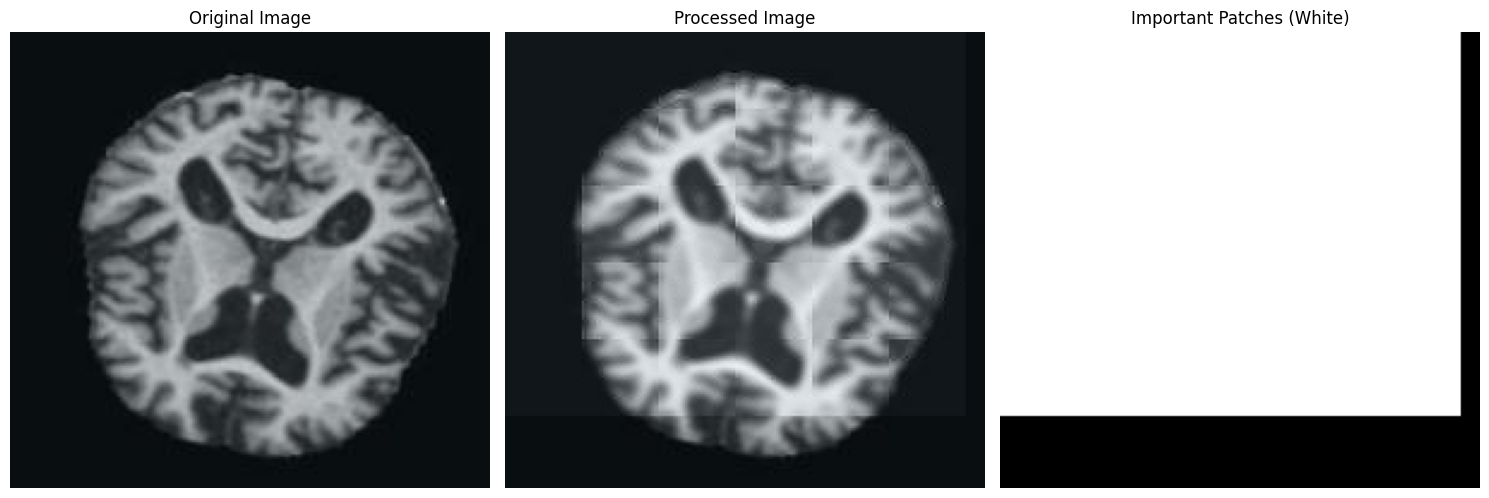


Processing complete!
Original image: /kaggle/input/ya-bxhxj/best_saved_test_images/image_10003_label_Moderate Demented.jpg
Processed image: /kaggle/input/ya-bxhxj/best_saved_test_images/image_10003_label_Moderate Demented_processed.jpg


In [35]:
import numpy as np
import cv2
import pickle
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

def load_model(model_path):
    """
    Load the trained KNN model from file
    
    Parameters:
    -----------
    model_path : str
        Path to the saved model file
        
    Returns:
    --------
    model : KNeighborsClassifier
        Loaded model
    """
    try:
        with open(model_path, 'rb') as f:
            model = pickle.load(f)
        print(f"Model successfully loaded from {model_path}")
        return model
    except Exception as e:
        print(f"Error loading model: {e}")
        return None

def process_image(image_path, model, patch_size=10, save_path=None):
    """
    Process an image by classifying patches and enhancing/blurring them accordingly
    
    Parameters:
    -----------
    image_path : str
        Path to the input image
    model : object
        Trained KNN model
    patch_size : int
        Size of patches to process (default: 10)
    save_path : str or None
        Path to save the processed image (optional)
        
    Returns:
    --------
    numpy.ndarray
        Processed image
    """
    # Load image
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Could not load image from {image_path}")
        return None
    
    # Get image dimensions
    height, width, channels = img.shape
    
    # Create a copy of the original image for output
    output_img = img.copy()
    
    # Create a visualization of classified patches
    patch_visualization = np.zeros((height, width), dtype=np.uint8)
    
    # Calculate number of patches in each dimension
    patches_h = height // patch_size
    patches_w = width // patch_size
    
    # Create scaler (similar to what was used in training)
    scaler = StandardScaler()
    
    # Process each patch
    print(f"Processing image with {patches_h}x{patches_w} patches...")
    
    for i in range(patches_h):
        for j in range(patches_w):
            # Extract patch coordinates
            y_start = i * patch_size
            y_end = (i + 1) * patch_size
            x_start = j * patch_size
            x_end = (j + 1) * patch_size
            
            # Extract the patch
            patch = img[y_start:y_end, x_start:x_end]
            
            # Resize patch to 32x32 (as per training code)
            patch_resized = cv2.resize(patch, (32, 32))
            
            # Flatten the patch and prepare for classification
            patch_features = patch_resized.flatten().reshape(1, -1)
            
            # Scale features (fit on this patch since we don't have the original scaler)
            patch_features_scaled = scaler.fit_transform(patch_features)
            
            # Classify patch
            is_important = model.predict(patch_features_scaled)[0]
            
            # Process based on classification
            if is_important == 1:  # Important patch
                # Apply Laplacian sharpening
                laplacian = cv2.Laplacian(patch, cv2.CV_64F)
                sharpened = patch.astype(np.float64) + 0.5 * laplacian
                
                # Increase intensity
                enhanced = cv2.convertScaleAbs(sharpened, alpha=1.2, beta=5)
                
                # Update output image
                output_img[y_start:y_end, x_start:x_end] = enhanced
                
                # Update visualization
                patch_visualization[y_start:y_end, x_start:x_end] = 255  # White for important
            else:  # Non-important patch
                # Apply Gaussian blur
                blurred = cv2.GaussianBlur(patch, (5, 5), 0)
                
                # Decrease intensity
                reduced = cv2.convertScaleAbs(blurred, alpha=0.4, beta=-5)
                
                # Update output image
                output_img[y_start:y_end, x_start:x_end] = reduced
                
                # Update visualization (keep as black for non-important)
    
    # Save processed image if requested
    if save_path:
        cv2.imwrite(save_path, output_img)
        
        # Save visualization too
        viz_path = os.path.splitext(save_path)[0] + "_visualization.png"
        cv2.imwrite(viz_path, patch_visualization)
        print(f"Processed image saved to {save_path}")
        print(f"Patch visualization saved to {viz_path}")
    
    return output_img, patch_visualization

def display_results(original_img, processed_img, patch_viz):
    """
    Display original and processed images with patch visualization
    """
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(processed_img, cv2.COLOR_BGR2RGB))
    plt.title("Processed Image")
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.imshow(patch_viz, cmap='gray')
    plt.title("Important Patches (White)")
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

def main():
    # Load the model
    model_path = '/kaggle/working/8-percent-acc-knn_patch_classifier.pkl'
    model = load_model(model_path)
    
    if model is None:
        print("Error: Could not load model. Exiting.")
        return
    
    # Get input image path from user
    image_path = input("Enter path to image to process: ")
    
    # Process the image
    original_img = cv2.imread(image_path)
    if original_img is None:
        print(f"Error: Could not load image from {image_path}")
        return
    
    # Generate output path
    output_path = os.path.splitext(image_path)[0] + "_processed" + os.path.splitext(image_path)[1]
    
    # Process the image
    processed_img, patch_viz = process_image(image_path, model, patch_size=32, save_path=output_path)
    
    if processed_img is not None:
        # Display results
        display_results(original_img, processed_img, patch_viz)
        
        print("\nProcessing complete!")
        print(f"Original image: {image_path}")
        print(f"Processed image: {output_path}")

if __name__ == "__main__":
    main()

In [ ]:
import numpy as np
import cv2
import os
import pickle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, average_precision_score
import seaborn as sns


def load_and_prepare_data(important_dir='important', non_important_dir='non_important', img_size=(32, 32)):
    """
    Load images from directories and prepare features and labels
    
    Parameters:
    -----------
    important_dir : str
        Directory containing important images
    non_important_dir : str
        Directory containing non-important images
    img_size : tuple
        Size to resize images to
        
    Returns:
    --------
    features : numpy.ndarray
        Image features (flattened pixel values)
    labels : numpy.ndarray
        Labels (1 for important, 0 for non-important)
    """
    features = []
    labels = []
    
    # Load important images (label 1)
    print(f"Loading important images from {important_dir}...")
    if os.path.exists(important_dir):
        for filename in os.listdir(important_dir):
            if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(important_dir, filename)
                try:
                    img = cv2.imread(img_path)
                    if img is not None:
                        img_resized = cv2.resize(img, img_size)
                        features.append(img_resized.flatten())
                        labels.append(1)
                except Exception as e:
                    print(f"Error loading {img_path}: {e}")
    else:
        print(f"Directory {important_dir} does not exist")
    
    # Load non-important images (label 0)
    print(f"Loading non-important images from {non_important_dir}...")
    if os.path.exists(non_important_dir):
        for filename in os.listdir(non_important_dir):
            if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(non_important_dir, filename)
                try:
                    img = cv2.imread(img_path)
                    if img is not None:
                        img_resized = cv2.resize(img, img_size)
                        features.append(img_resized.flatten())
                        labels.append(0)
                except Exception as e:
                    print(f"Error loading {img_path}: {e}")
    else:
        print(f"Directory {non_important_dir} does not exist")
    
    # Convert to numpy arrays
    features = np.array(features)
    labels = np.array(labels)
    
    print(f"Loaded {len(features)} images in total")
    
    return features, labels


def train_knn_model(features, labels, test_size=0.2, random_state=42, n_neighbors=5):
    """
    Train a KNN model on the given features and labels
    
    Parameters:
    -----------
    features : numpy.ndarray
        Image features
    labels : numpy.ndarray
        Image labels
    test_size : float
        Fraction of data to use for testing
    random_state : int
        Random seed for reproducibility
    n_neighbors : int
        Number of neighbors for KNN
        
    Returns:
    --------
    model : KNeighborsClassifier
        Trained KNN model
    (X_test, y_test) : tuple
        Test data and labels
    """
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        features, labels, test_size=test_size, random_state=random_state
    )
    
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train the model
    print(f"Training KNN model with k={n_neighbors}...")
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train_scaled, y_train)
    
    # Evaluate the model
    train_accuracy = knn.score(X_train_scaled, y_train)
    test_accuracy = knn.score(X_test_scaled, y_test)
    
    print(f"Training accuracy: {train_accuracy:.4f}")
    print(f"Testing accuracy: {test_accuracy:.4f}")
    
    return knn, (X_test_scaled, y_test)


def save_model(model, filename):
    """
    Save the trained model to a file
    
    Parameters:
    -----------
    model : object
        Trained model to save
    filename : str
        Filename to save the model to
    """
    with open(filename, 'wb') as f:
        pickle.dump(model, f)
    print(f"Model saved to {filename}")


def evaluate_model_thoroughly(model, X_test, y_test):
    """
    Perform thorough evaluation of the model with visualizations
    
    Parameters:
    -----------
    model : KNeighborsClassifier
        Trained KNN model
    X_test : numpy.ndarray
        Test features
    y_test : numpy.ndarray
        Test labels
        
    Returns:
    --------
    dict
        Dictionary containing evaluation metrics
    """
    # Get predictions and probabilities
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Calculate additional metrics
    auc_score = roc_auc_score(y_test, y_prob)
    avg_precision = average_precision_score(y_test, y_prob)
    
    # Create a figure with multiple subplots
    plt.figure(figsize=(16, 12))
    
    # Confusion Matrix
    plt.subplot(2, 2, 1)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Non-Important', 'Important'],
                yticklabels=['Non-Important', 'Important'])
    plt.title(f'Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    # ROC Curve
    plt.subplot(2, 2, 2)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'AUC = {auc_score:.3f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    
    # Precision-Recall Curve
    plt.subplot(2, 2, 3)
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    plt.plot(recall, precision, label=f'AP = {avg_precision:.3f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    
    # Distribution of prediction probabilities by class
    plt.subplot(2, 2, 4)
    pos_probs = y_prob[y_test == 1]
    neg_probs = y_prob[y_test == 0]
    plt.hist(pos_probs, alpha=0.7, label='Important', bins=20, color='green')
    plt.hist(neg_probs, alpha=0.7, label='Non-Important', bins=20, color='red')
    plt.xlabel('Probability of Important Class')
    plt.ylabel('Count')
    plt.title('Distribution of Prediction Probabilities')
    plt.legend()
    
    plt.tight_layout()
    plt.savefig('model_evaluation.png')
    plt.show()
    
    # Print metrics
    print(f"ROC AUC Score: {auc_score:.4f}")
    print(f"Average Precision Score: {avg_precision:.4f}")
    
    return {
        'confusion_matrix': cm,
        'auc_score': auc_score,
        'average_precision': avg_precision
    }


def analyze_misclassifications(model, X_test, y_test, features_test, test_indices, 
                               important_dir='important', non_important_dir='non_important'):
    """
    Analyze misclassified examples to understand model weaknesses
    
    Parameters:
    -----------
    model : KNeighborsClassifier
        Trained KNN model
    X_test : numpy.ndarray
        Test features
    y_test : numpy.ndarray
        Test labels
    features_test : numpy.ndarray
        Original test features before normalization
    test_indices : numpy.ndarray
        Indices of test samples in the original dataset
    important_dir : str
        Directory containing important images
    non_important_dir : str
        Directory containing non-important images
    """
    # Get predictions
    y_pred = model.predict(X_test)
    
    # Find misclassified examples
    misclassified = y_test != y_pred
    mis_indices = np.where(misclassified)[0]
    
    print(f"Found {len(mis_indices)} misclassified examples")
    
    # If there are no misclassifications, return
    if len(mis_indices) == 0:
        return
    
    # Function to load original images
    def load_original_image(index, true_label):
        dir_path = important_dir if true_label == 1 else non_important_dir
        filenames = sorted(os.listdir(dir_path))
        original_idx = test_indices[index]
        if original_idx < len(filenames):
            img_path = os.path.join(dir_path, filenames[original_idx])
            return cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
        return None
    
    # Display some misclassified examples
    plt.figure(figsize=(15, 10))
    
    num_to_display = min(10, len(mis_indices))
    for i, idx in enumerate(mis_indices[:num_to_display]):
        plt.subplot(2, 5, i+1)
        
        # Extract feature vector and reshape to image
        feature_vector = X_test[idx]
        img_reshaped = feature_vector.reshape(32, 32, 3).astype(np.uint8)
        
        plt.imshow(img_reshaped)
        true_label = "Important" if y_test[idx] == 1 else "Non-Important"
        pred_label = "Important" if y_pred[idx] == 1 else "Non-Important"
        plt.title(f"True: {true_label}\nPred: {pred_label}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.savefig('misclassified_examples.png')
    plt.show()


def perform_cross_validation(features, labels, n_splits=5, n_jobs=-1):
    """
    Perform k-fold cross-validation and analyze results
    
    Parameters:
    -----------
    features : numpy.ndarray
        Image features
    labels : numpy.ndarray
        Image labels
    n_splits : int
        Number of cross-validation folds
    n_jobs : int
        Number of jobs to run in parallel
        
    Returns:
    --------
    dict
        Cross-validation results
    """
    from sklearn.model_selection import cross_validate, KFold
    from sklearn.neighbors import KNeighborsClassifier
    
    # Define model
    knn = KNeighborsClassifier(n_neighbors=10)
    
    # Define cross-validation strategy
    cv = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    # Define scoring metrics
    scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    
    # Perform cross-validation
    print(f"Performing {n_splits}-fold cross-validation...")
    cv_results = cross_validate(knn, features, labels, cv=cv, 
                                scoring=scoring, n_jobs=n_jobs)
    
    # Print results
    print("\nCross-validation results:")
    for metric in scoring:
        metric_key = f'test_{metric}'
        values = cv_results[metric_key]
        print(f"{metric}: {values.mean():.4f} ± {values.std():.4f}")
    
    # Visualize results
    plt.figure(figsize=(10, 6))
    plt.boxplot([cv_results[f'test_{metric}'] for metric in scoring], labels=scoring)
    plt.title('Cross-validation Results')
    plt.ylabel('Score')
    plt.grid(True, alpha=0.3)
    plt.savefig('cross_validation_results.png')
    plt.show()
    
    return cv_results


def hyperparameter_tuning(features, labels):
    """
    Perform hyperparameter tuning for the KNN model with very simple progress printing
    """
    from sklearn.model_selection import train_test_split, ParameterGrid
    from sklearn.neighbors import KNeighborsClassifier
    import matplotlib.pyplot as plt
    import time
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        features, labels, test_size=0.2, random_state=42
    )
    
    # Define parameter grid - simplified for faster results
    param_grid = {
        'n_neighbors': [3, 10, 7, 9, 11, 13, 15],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']  # Removed minkowski for speed
    }
    
    print("Starting hyperparameter tuning...")
    print("=" * 50)
    
    # Create grid
    grid = list(ParameterGrid(param_grid))
    total = len(grid)
    
    # Track best parameters and score
    best_score = 0
    best_params = None
    best_model = None
    
    # Results storage for plotting
    k_values = param_grid['n_neighbors']
    k_scores = {k: [] for k in k_values}
    
    # Print total combinations
    print(f"Total combinations to test: {total}")
    start_time = time.time()
    
    # Simple counter for progress
    counter = 0
    
    # Process each k value separately
    for k in k_values:
        print(f"\nTesting k={k}...")
        k_start = time.time()
        
        # Test all combinations with this k value
        k_grid = [p for p in grid if p['n_neighbors'] == k]
        
        for params in k_grid:
            # Update and print progress
            counter += 1
            if counter % 2 == 0:  # Print every 2nd combination
                elapsed = time.time() - start_time
                print(f"Progress: {counter}/{total} combinations complete ({counter/total*100:.1f}%) - Elapsed time: {elapsed:.1f}s")
            
            # Create and train model
            model = KNeighborsClassifier(**params)
            model.fit(X_train, y_train)
            
            # Evaluate
            score = model.score(X_test, y_test)
            k_scores[k].append(score)
            
            # Update best if needed
            if score > best_score:
                best_score = score
                best_params = params
                best_model = model
        
        # Print k summary
        k_elapsed = time.time() - k_start
        print(f"Completed k={k} in {k_elapsed:.1f}s - Best score: {max(k_scores[k]):.4f}")
    
    # Print final results
    total_time = time.time() - start_time
    print("\n" + "=" * 50)
    print(f"Hyperparameter tuning completed in {total_time:.1f} seconds")
    print(f"Best parameters: {best_params}")
    print(f"Best score: {best_score:.4f}")
    
    # Test accuracy with best model
    test_accuracy = best_model.score(X_test, y_test)
    print(f"Test accuracy with best model: {test_accuracy:.4f}")
    
    # Plot results
    plt.figure(figsize=(10, 6))
    
    # Calculate average score for each k
    avg_scores = [sum(scores)/len(scores) for k, scores in k_scores.items()]
    best_scores = [max(scores) for k, scores in k_scores.items()]
    
    plt.plot(k_values, avg_scores, 'o-', label='Average score')
    plt.plot(k_values, best_scores, 'o-', label='Best score')
    
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('Accuracy')
    plt.title('KNN Performance by k Value')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.savefig('hyperparameter_tuning_results.png')
    plt.show()
    
    # Create a result object for compatibility
    class GridSearchResult:
        def __init__(self, best_estimator, best_params, best_score):
            self.best_estimator_ = best_estimator
            self.best_params_ = best_params
            self.best_score_ = best_score
    
    return GridSearchResult(best_model, best_params, best_score)

if __name__ == "__main__":
    # Load and prepare data
    features, labels = load_and_prepare_data()
    
    # Print data distribution
    unique, counts = np.unique(labels, return_counts=True)
    print("Data distribution:")
    for label, count in zip(unique, counts):
        label_name = "Important" if label == 1 else "Non-important"
        print(f"  {label_name}: {count} samples")
    
    # Train model
    knn_model, (X_test, y_test) = train_knn_model(features, labels)
    
    # Additional evaluation
    results = evaluate_model_thoroughly(knn_model, X_test, y_test)
    
    # Get indices for test set 
    _, _, _, _, test_indices = train_test_split(
        features, labels, range(len(features)), test_size=0.2, random_state=42
    )
    
    # Analyze misclassifications
    analyze_misclassifications(knn_model, X_test, y_test, X_test, test_indices)
    
    # Perform cross-validation
    cv_results = perform_cross_validation(features, labels)
    
    # Perform hyperparameter tuning
    best_model = hyperparameter_tuning(features, labels)
    
    # Save the best model
    save_model(best_model.best_estimator_, 'best_knn_patch_classifier.pkl')